# Plagiarism Detection

## 1. Import Libraries

In [1]:
# standard libraries
import numpy as np
import pandas as pd

# machine learning libraries
from sklearn.decomposition import PCA

## 2. Read and Encode Exam Results

In [2]:
df = pd.read_csv("exam_results_enc.csv")

In [3]:
df

,026a11501c7dcd945a2c93c90b41335758387cffdd05ba3ea7a8999b25a57e4a,0338a3869561dfda5f4d6ab33b39ba27f44a361f67704309a6649bfd34eb3dbb,03449b28740a61ab701a318b2d5966ab20413ffbbb0c326b545982f4bd87f5c6,0c6c4fbe8705f7ee24e7b473d603f69ace952031d7a2754cad416408a74d1b6a,0d4b5c485748fbeae5a56f1f041d6738fdd1831e7bc84f412bddfe9c84118a61,0e3b5d144454977a4eca280bf3ed36c25d1c80a4fa6dd008e6d578f6c7fbe49c,0ef35544b5bb7bb0b1d1752479edc1055f4415353b40237359720b7a4735457b,0fd15ccc2bfe43f85a20572ba595c3f69f3a1201822feb49a9b927a16a8af326,15eb56f00c71e813bff7c6d41827f2a9b731b5060a417472b6f0cff9271bcee1,194c32342e56d635a900484403958a007cbb994bbafd22ac0453386c12f3af5d,...,d40f19bf1794cd04f7755762be1d4c0679564e75abd9d44974d5c3f2f75a8bfe,dac1876b170e3ee191877ac94a899a34f37da3132ab4c48471682380f4102323,e2dcde6b7576baef214215a5ca6f202dd1992bf9976048ea16962c6f1fc49991,e4d09b9c0499c19b84255f33a6e0acd7c2d898e2df4547ff5f9bbc4184e598f3,eb51538870a62e91ab9bdf455757af0e810775fcfa8c5b9d0d4d6fe6c037ffb1,ed99223d21af2088292c3fed0c23e8bee35b4d20f46ff79d00ca2a109fdb3aab,ef1cc868a87d5060f3bf45e3dfc8409fec5e5b3ba9881076275f6f40152685a8,f062b468d532324fcb01a3a0b9d6e19450f9b864d803ae7d95ad748b15716a2e,fb19c7bbf46050f67d3d5f160ec4d4595d3d9f8cf1074eca9f38fbaf9193c966,fba1da60c50525da09a6f5452a0f3e8f8ff2131bf2cae7823539bab4059a064d
0,1.0,1.0,1.0,1.0,1,1.0,1,1,1,-1.0,...,1.0,1.0,0.5,1,1.0,1.0,1.0,1.00,0.5,1
1,1.0,0.5,1.0,0.5,1,1.0,1,1,-1,0.5,...,-1.0,0.5,1.0,1,1.0,1.0,1.0,0.50,0.5,1
2,-1.0,1.0,1.0,1.0,1,1.0,-1,1,1,1.0,...,1.0,1.0,1.0,1,1.0,0.5,-1.0,1.00,-1.0,-1
3,1.0,-1.0,1.0,1.0,-1,1.0,1,1,1,1.0,...,-1.0,1.0,1.0,1,1.0,1.0,1.0,-1.00,0.5,1
4,1.0,1.0,1.0,1.0,1,1.0,1,1,1,1.0,...,1.0,1.0,1.0,1,1.0,1.0,1.0,-1.00,1.0,-1
5,1.0,1.0,1.0,1.0,1,1.0,1,1,1,1.0,...,1.5,1.0,1.0,1,1.0,1.0,1.0,1.00,1.0,1
6,-1.0,1.0,1.0,1.0,1,1.0,-1,1,1,1.0,...,1.0,1.0,1.0,1,1.0,1.0,-1.0,-1.00,-1.0,1
7,-1.0,-1.0,1.0,-1.0,-1,1.0,-1,1,1,-1.0,...,-1.0,1.0,1.0,1,1.0,1.0,1.0,-1.00,1.0,-1
8,1.0,1.0,1.0,1.0,1,1.0,1,1,1,1.0,...,1.0,1.0,1.0,1,1.0,1.0,1.0,1.00,1.0,1
9,1.0,1.0,1.0,1.0,1,1.0,1,1,1,1.0,...,1.0,1.0,1.0,1,1.0,1.0,1.0,-1.00,1.0,-1


In [4]:
# individual score 
df.sum()

026a11501c7dcd945a2c93c90b41335758387cffdd05ba3ea7a8999b25a57e4a    20.5
0338a3869561dfda5f4d6ab33b39ba27f44a361f67704309a6649bfd34eb3dbb    22.5
03449b28740a61ab701a318b2d5966ab20413ffbbb0c326b545982f4bd87f5c6    32.5
0c6c4fbe8705f7ee24e7b473d603f69ace952031d7a2754cad416408a74d1b6a    29.5
0d4b5c485748fbeae5a56f1f041d6738fdd1831e7bc84f412bddfe9c84118a61    25.0
                                                                    ... 
ed99223d21af2088292c3fed0c23e8bee35b4d20f46ff79d00ca2a109fdb3aab    32.5
ef1cc868a87d5060f3bf45e3dfc8409fec5e5b3ba9881076275f6f40152685a8    22.5
f062b468d532324fcb01a3a0b9d6e19450f9b864d803ae7d95ad748b15716a2e     1.0
fb19c7bbf46050f67d3d5f160ec4d4595d3d9f8cf1074eca9f38fbaf9193c966    11.0
fba1da60c50525da09a6f5452a0f3e8f8ff2131bf2cae7823539bab4059a064d    17.0
Length: 88, dtype: float64

## 3. Transform and apply PCA

In [5]:
X = np.array(df).transpose()

In [6]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(X)

# get explained variance
round(sum(list(pca.explained_variance_ratio_))*100, 2)

98.76

In [7]:
# apply PCA
X_new = pca.fit_transform(X)

In [8]:
X_new[0]

array([ 1.22511413,  1.3430405 , -2.45413238,  0.31015225, -0.66363812,
        0.13212271,  0.2787349 ,  0.33327687, -0.02139073, -0.07335368,
       -0.66207492,  0.13656468, -0.46377402,  0.25226598,  0.14677369,
       -0.30393537,  0.43488852, -0.10559204,  0.32655747,  0.36693694,
        0.02555841, -0.46055655,  0.42692931,  0.51136485, -0.16699107])

## 4. Calculate Similarities between Exams

In [9]:
# define cosine distance as similarity measure
def cosine(a, b):
     return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [10]:
cosine(X_new[0], X_new[20])

0.21787919557321736

In [11]:
# create similarity matrix
sims = np.empty([len(X_new), len(X_new)])
for stud in range(len(X_new)):
    for peer in range(len(X_new)):
        sims[stud][peer] = cosine(X_new[stud], X_new[peer])

In [12]:
df_sims = pd.DataFrame(sims)
df_sims.columns = list(df.columns)
df_sims.index = list(df.columns)

In [13]:
df_sims

,026a11501c7dcd945a2c93c90b41335758387cffdd05ba3ea7a8999b25a57e4a,0338a3869561dfda5f4d6ab33b39ba27f44a361f67704309a6649bfd34eb3dbb,03449b28740a61ab701a318b2d5966ab20413ffbbb0c326b545982f4bd87f5c6,0c6c4fbe8705f7ee24e7b473d603f69ace952031d7a2754cad416408a74d1b6a,0d4b5c485748fbeae5a56f1f041d6738fdd1831e7bc84f412bddfe9c84118a61,0e3b5d144454977a4eca280bf3ed36c25d1c80a4fa6dd008e6d578f6c7fbe49c,0ef35544b5bb7bb0b1d1752479edc1055f4415353b40237359720b7a4735457b,0fd15ccc2bfe43f85a20572ba595c3f69f3a1201822feb49a9b927a16a8af326,15eb56f00c71e813bff7c6d41827f2a9b731b5060a417472b6f0cff9271bcee1,194c32342e56d635a900484403958a007cbb994bbafd22ac0453386c12f3af5d,...,d40f19bf1794cd04f7755762be1d4c0679564e75abd9d44974d5c3f2f75a8bfe,dac1876b170e3ee191877ac94a899a34f37da3132ab4c48471682380f4102323,e2dcde6b7576baef214215a5ca6f202dd1992bf9976048ea16962c6f1fc49991,e4d09b9c0499c19b84255f33a6e0acd7c2d898e2df4547ff5f9bbc4184e598f3,eb51538870a62e91ab9bdf455757af0e810775fcfa8c5b9d0d4d6fe6c037ffb1,ed99223d21af2088292c3fed0c23e8bee35b4d20f46ff79d00ca2a109fdb3aab,ef1cc868a87d5060f3bf45e3dfc8409fec5e5b3ba9881076275f6f40152685a8,f062b468d532324fcb01a3a0b9d6e19450f9b864d803ae7d95ad748b15716a2e,fb19c7bbf46050f67d3d5f160ec4d4595d3d9f8cf1074eca9f38fbaf9193c966,fba1da60c50525da09a6f5452a0f3e8f8ff2131bf2cae7823539bab4059a064d
026a11501c7dcd945a2c93c90b41335758387cffdd05ba3ea7a8999b25a57e4a,1.000000,0.093990,-0.390137,0.041578,-0.293017,-0.372127,0.552068,-0.386251,-0.436308,0.250724,...,-0.398127,-0.196092,-0.508083,-0.386251,-0.124096,-0.303097,0.491349,0.147969,0.407435,-0.061285
0338a3869561dfda5f4d6ab33b39ba27f44a361f67704309a6649bfd34eb3dbb,0.093990,1.000000,-0.312808,0.187335,0.121850,-0.287855,-0.321286,-0.285384,-0.237839,0.372856,...,0.403306,0.171958,-0.420704,-0.285384,-0.054757,-0.321735,0.269261,0.212650,-0.201438,-0.243029
03449b28740a61ab701a318b2d5966ab20413ffbbb0c326b545982f4bd87f5c6,-0.390137,-0.312808,1.000000,0.297596,0.108499,0.981328,-0.032410,0.981214,0.694698,-0.115007,...,-0.059949,0.138533,0.644543,0.981214,0.465325,0.957413,-0.168665,-0.576980,-0.423980,-0.029203
0c6c4fbe8705f7ee24e7b473d603f69ace952031d7a2754cad416408a74d1b6a,0.041578,0.187335,0.297596,1.000000,0.162121,0.309015,0.039369,0.332128,0.299204,0.357715,...,0.127195,-0.297236,0.093848,0.332128,-0.166958,0.305227,-0.167514,-0.273332,-0.458151,0.030240
0d4b5c485748fbeae5a56f1f041d6738fdd1831e7bc84f412bddfe9c84118a61,-0.293017,0.121850,0.108499,0.162121,1.000000,0.122375,-0.052462,0.129497,0.022530,-0.129939,...,0.541681,-0.237740,-0.036660,0.129497,0.254489,0.105787,-0.453716,-0.222066,-0.544062,-0.029897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ed99223d21af2088292c3fed0c23e8bee35b4d20f46ff79d00ca2a109fdb3aab,-0.303097,-0.321735,0.957413,0.305227,0.105787,0.939766,0.075814,0.978232,0.689605,-0.160455,...,-0.072585,0.142347,0.645194,0.978232,0.431095,1.000000,-0.057094,-0.595551,-0.434961,0.052391
ef1cc868a87d5060f3bf45e3dfc8409fec5e5b3ba9881076275f6f40152685a8,0.491349,0.269261,-0.168665,-0.167514,-0.453716,-0.157571,0.089591,-0.147442,-0.228991,0.031640,...,-0.233266,0.283062,-0.279423,-0.147442,0.048454,-0.057094,1.000000,0.093880,0.335428,-0.114311
f062b468d532324fcb01a3a0b9d6e19450f9b864d803ae7d95ad748b15716a2e,0.147969,0.212650,-0.576980,-0.273332,-0.222066,-0.546831,-0.088079,-0.568658,-0.486495,-0.130011,...,-0.014410,0.173827,-0.531921,-0.568658,-0.348222,-0.595551,0.093880,1.000000,0.152292,0.447728
fb19c7bbf46050f67d3d5f160ec4d4595d3d9f8cf1074eca9f38fbaf9193c966,0.407435,-0.201438,-0.423980,-0.458151,-0.544062,-0.476631,0.244518,-0.498194,-0.406413,-0.130756,...,-0.421475,0.022314,-0.211781,-0.498194,-0.203782,-0.434961,0.335428,0.152292,1.000000,-0.122750


## 5. Create Pairwise Comparison of Most Similar Exams

In [14]:
pairwise = df_sims.stack().sort_values(ascending=False).reset_index()
pairwise = pairwise[pairwise["level_0"]!=pairwise["level_1"]]

In [15]:
# add points to DataFrame
points = pd.DataFrame(df.sum().sort_values(ascending=False))
points["name"] = points.index

In [16]:
# join information
result = pd.merge(pairwise, points, left_on="level_0", right_on="name", how= "inner")
result = pd.merge(result, points, left_on="level_1", right_on="name", how= "inner")

result = result.rename(columns={"level_0":"student_1", "level_1":"student_2", "0_x":"similarity", "0_y":"score_1", 0:"score_2"})

result = result[["student_1", "student_2", "similarity","score_1", "score_2"]].reset_index(drop=True)

result = result.sort_values(by="similarity", ascending=False)

In [17]:
# show only those with mistakes
result[(result["score_1"]<31) & (result["score_2"]<31) & (result["student_1"]<result["student_2"])][:40]

,student_1,student_2,similarity,score_1,score_2
4355,2d4f3502362de8cd2fa516d2df7baad9a05a8f8f1946af...,47b05905c3c1019ea6508ebc26152e4828ae462e1bdd53...,1.000000,24.5,24.5
4972,194c32342e56d635a900484403958a007cbb994bbafd22...,771f7836e801cd812652ce264f3909021eae124b7c0696...,0.986968,24.0,24.5
6628,474266f1cc093c59884b44b7da4e43f18948d0fad8395d...,74a3c14c6ea2431a00d3d6691d87ad391d5a443398cd87...,0.982976,14.5,13.0
3243,5c239d747963f76000ed162e15dda89e4f35bcc31301a4...,90eff4d5d6f8d0aaef988afab79d2810406f9aecc08ead...,0.859316,25.0,23.0
3157,0ef35544b5bb7bb0b1d1752479edc1055f4415353b4023...,5c239d747963f76000ed162e15dda89e4f35bcc31301a4...,0.852556,23.0,25.0
5943,2b8f2fcf56a3ef856961f97b58bcdd806e92754fce1da5...,7d97e125e0be86a58bafc293f83cdbc18d42a78bcd3108...,0.792637,16.0,21.0
7424,74c63165de6606d2049ae30baefac5ddc6c45a797c5fc9...,af73b431a9d3eed7f1cec0dd102bd1c3e3e794a7b8b71f...,0.778211,9.0,4.5
2206,1abd9c5250995bc4a353730d86d06ce00f6ca6cdfed166...,d023d6faca088c6b914bf08bfb86bc831a45da52722d43...,0.755804,26.5,29.0
1773,3eb7a60a285c377032b019c7b265b834b4c62ebc0420d1...,5b257fe240acea4b3a063aefdff249add430cd439142ce...,0.746572,27.0,30.0
3244,0ef35544b5bb7bb0b1d1752479edc1055f4415353b4023...,90eff4d5d6f8d0aaef988afab79d2810406f9aecc08ead...,0.724920,23.0,23.0


## 6. Visualisation

### A) Histogram

In [18]:
result_tbl = result[result["student_1"]<result["student_2"]]#["similarity"]

In [19]:
top_20_perc = result["score_1"].quantile(q=0.8)

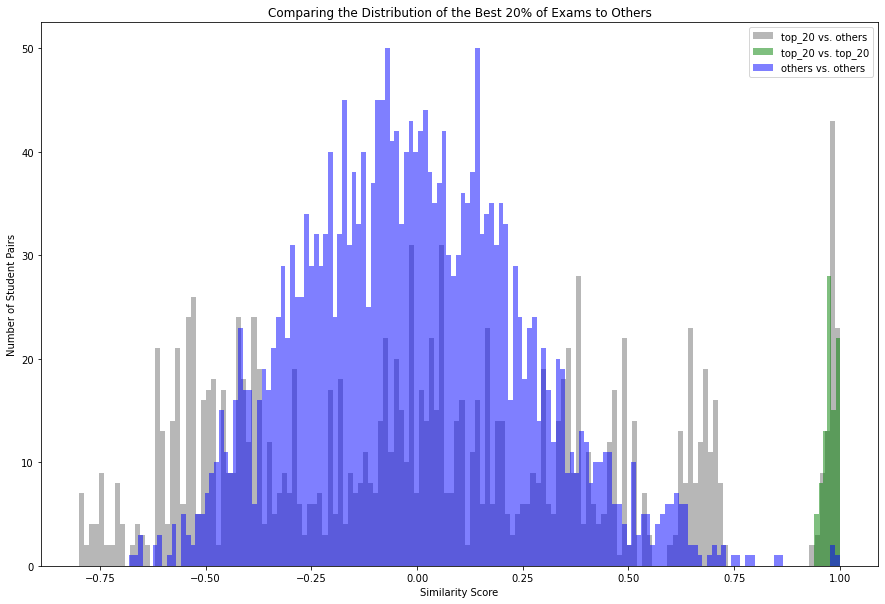

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
cond = (result_tbl["score_1"]<top_20_perc) & (result_tbl["score_2"]<top_20_perc)
plt.hist(result_tbl[[not c for c in cond]]["similarity"], bins=150, alpha=0.6, label='top_20 vs. others', color="#888888")
plt.hist(result_tbl[(result_tbl["score_1"]>top_20_perc) & (result_tbl["score_2"]>top_20_perc)]["similarity"], color = "g", bins=6, alpha=0.5, label='top_20 vs. top_20')
plt.hist(result_tbl[cond]["similarity"], bins=150, alpha=0.5, label='others vs. others', color="b")
plt.xlabel("Similarity Score")
plt.ylabel("Number of Student Pairs")
plt.title("Comparing the Distribution of the Best 20% of Exams to Others")
plt.legend(loc='upper right')
plt.savefig("dist.png")
plt.show()

### B) 2-Dimensional Distribution

In [21]:
# pca with reduction to 2 dimensions

pca_2 = PCA(n_components=2)
pca_2.fit(X)

# get explained variance
round(sum(list(pca_2.explained_variance_ratio_))*100, 2)

34.61

In [22]:
# apply PCA
X_2 = pca_2.fit_transform(X)

In [24]:
y = df.sum()

In [25]:
# apply k-means clustering for plot coloring

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1],
      dtype=int32)

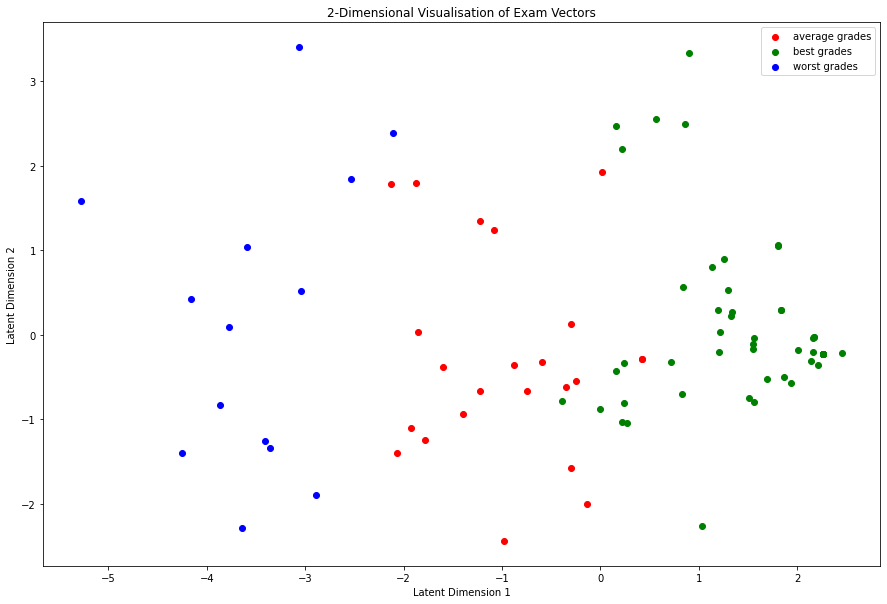

In [26]:
import pylab as pl
target_names = kmeans.labels_
pl.figure(figsize=(15, 10))
for c, i, target_name in zip("rgb", [0, 1, 2], ["average grades","best grades","worst grades"]):
   pl.scatter(X_2[kmeans.labels_==i,0]*(-1), X_2[kmeans.labels_==i,1], c=c, label=target_name)
pl.legend()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
pl.title('2-Dimensional Visualisation of Exam Vectors')
pl.savefig("points.png")
pl.show()

In [27]:
points_cluster0 = [x.sum() for x in X[kmeans.labels_==0,]]
sum(points_cluster0)/len(points_cluster0)

20.08695652173913

In [28]:
points_cluster1 = [x.sum() for x in X[kmeans.labels_==1,]]
sum(points_cluster1)/len(points_cluster1)

28.470588235294116

In [29]:
points_cluster2 = [x.sum() for x in X[kmeans.labels_==2,]]
sum(points_cluster2)/len(points_cluster2)

6.0